# Feature Selection on Iris Dataset

This notebook demonstrates various feature selection techniques on the Iris dataset:
1. Load and explore the dataset
2. Implement different feature selection methods
3. Compare model performance with different feature subsets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Basic dataset info
print("Dataset Shape:", X.shape)
print("\nFeatures:\n", X.columns.tolist())
print("\nFirst few rows:\n", X.head())
print("\nBasic Statistics:\n", X.describe())

Dataset Shape: (150, 4)

Features:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

First few rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Basic Statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000 

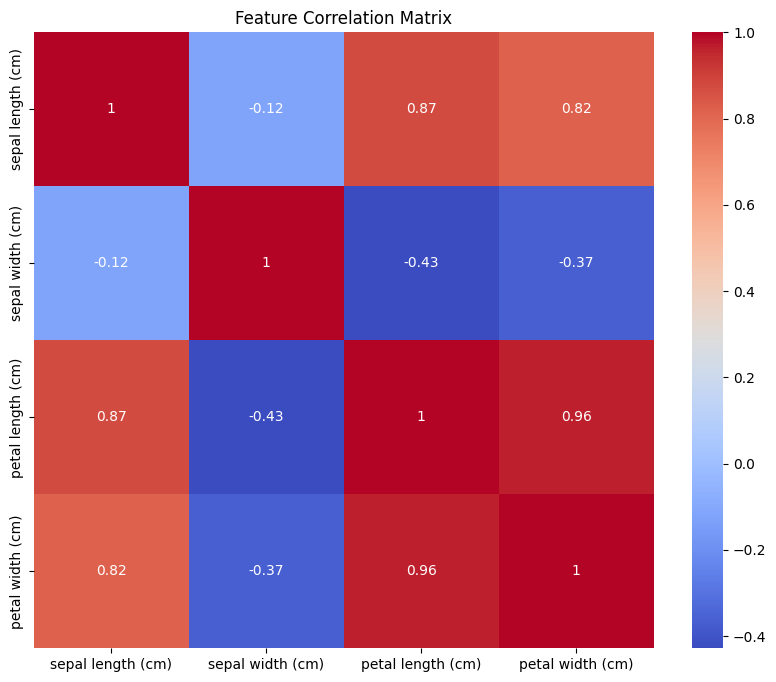

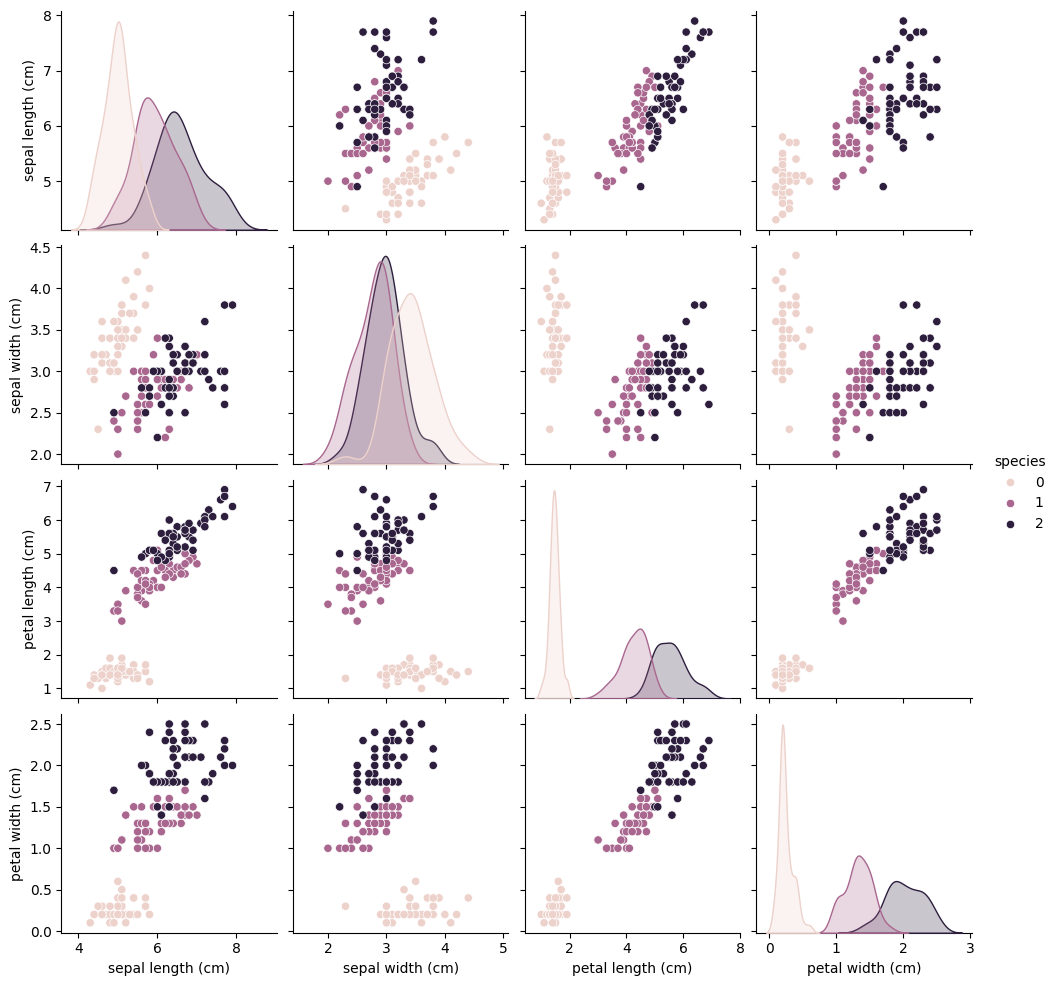

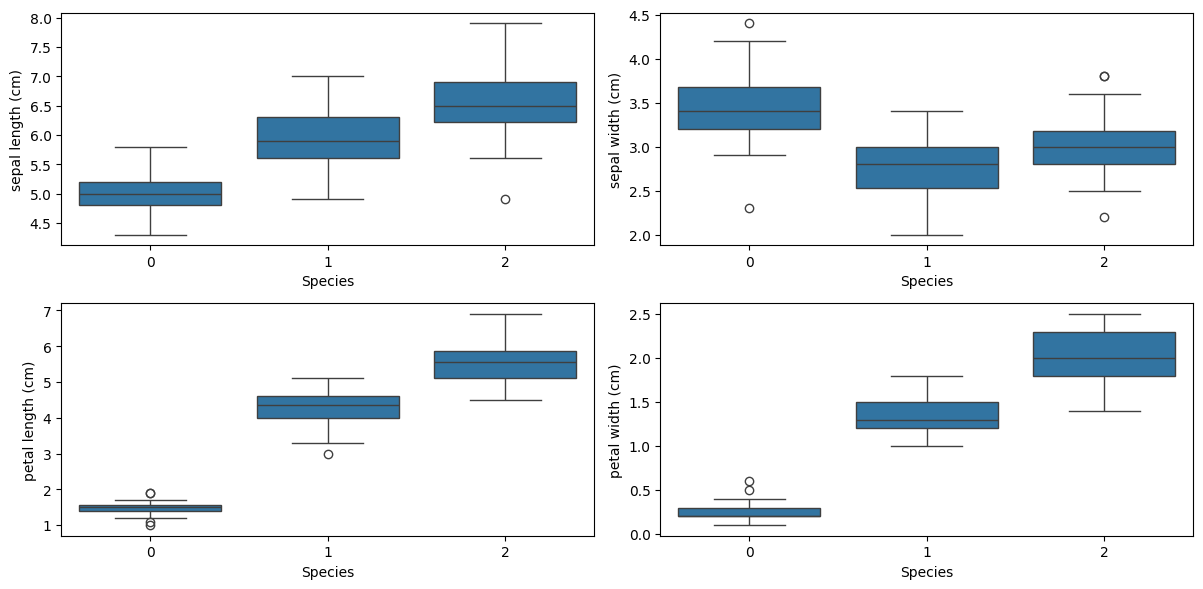

In [3]:
# Exploratory Data Analysis

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Pairplot
iris_df = X.copy()
iris_df['species'] = iris.target
sns.pairplot(iris_df, hue='species')
plt.show()

# Box plots
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=iris.target, y=X[feature])
    plt.xlabel('Species')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [4]:
# Split data and scale features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Base model performance (SVM)
base_model = SVC(kernel='linear', random_state=42)
base_model.fit(X_train_scaled, y_train)
base_pred = base_model.predict(X_test_scaled)
base_accuracy = accuracy_score(y_test, base_pred)

print("Base Model Performance (all features):")
print(f"Accuracy: {base_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, base_pred))

Base Model Performance (all features):
Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [5]:
# 1. Univariate Feature Selection
selector_univariate = SelectKBest(score_func=f_classif, k=2)
X_train_uni = selector_univariate.fit_transform(X_train_scaled, y_train)
X_test_uni = selector_univariate.transform(X_test_scaled)

# Get selected feature indices
selected_features_uni = X.columns[selector_univariate.get_support()].tolist()
print("Selected features (Univariate):", selected_features_uni)

# Train and evaluate model
model_uni = SVC(kernel='linear', random_state=42)
model_uni.fit(X_train_uni, y_train)
pred_uni = model_uni.predict(X_test_uni)
accuracy_uni = accuracy_score(y_test, pred_uni)

print(f"\nAccuracy with univariate selection: {accuracy_uni:.4f}")

Selected features (Univariate): ['petal length (cm)', 'petal width (cm)']

Accuracy with univariate selection: 1.0000


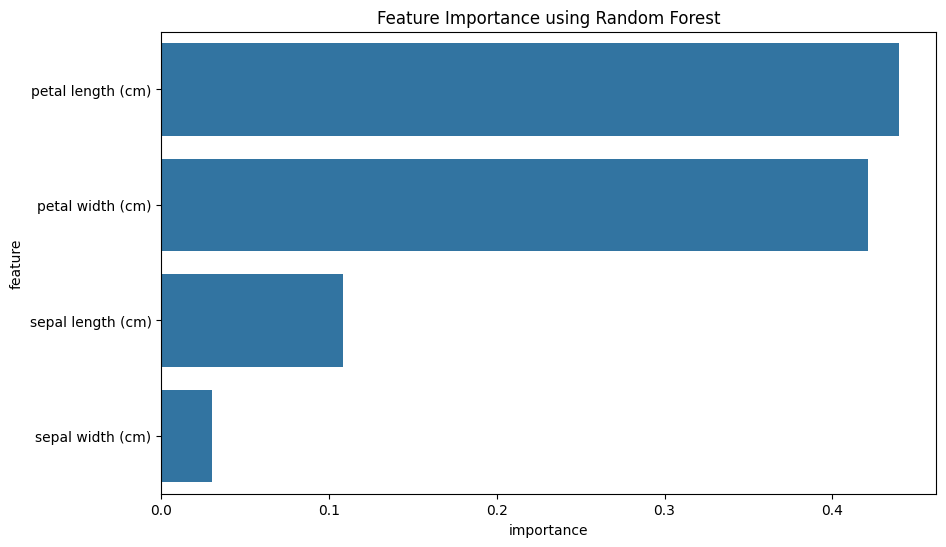


Accuracy with Random Forest selection: 1.0000


In [6]:
# 2. Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Get feature importance
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
})
importances = importances.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Feature Importance using Random Forest')
plt.show()

# Select top 2 features
top_features = importances['feature'][:2].tolist()
X_train_rf = X_train_scaled[:, [list(X.columns).index(f) for f in top_features]]
X_test_rf = X_test_scaled[:, [list(X.columns).index(f) for f in top_features]]

# Train and evaluate model
model_rf = SVC(kernel='linear', random_state=42)
model_rf.fit(X_train_rf, y_train)
pred_rf = model_rf.predict(X_test_rf)
accuracy_rf = accuracy_score(y_test, pred_rf)

print(f"\nAccuracy with Random Forest selection: {accuracy_rf:.4f}")

In [7]:
# 3. Recursive Feature Elimination
svc = SVC(kernel='linear', random_state=42)
rfe = RFE(estimator=svc, n_features_to_select=2)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Get selected features
selected_features_rfe = X.columns[rfe.support_].tolist()
print("Selected features (RFE):", selected_features_rfe)

# Train and evaluate model
model_rfe = SVC(kernel='linear', random_state=42)
model_rfe.fit(X_train_rfe, y_train)
pred_rfe = model_rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, pred_rfe)

print(f"\nAccuracy with RFE selection: {accuracy_rfe:.4f}")

Selected features (RFE): ['petal length (cm)', 'petal width (cm)']

Accuracy with RFE selection: 1.0000


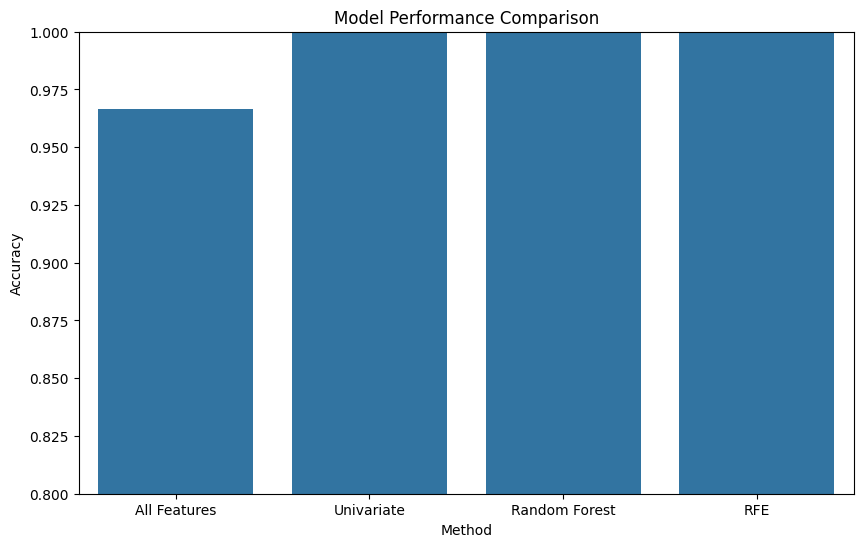


Performance Summary:
          Method  Accuracy
0   All Features  0.966667
1     Univariate  1.000000
2  Random Forest  1.000000
3            RFE  1.000000


In [8]:
# Compare all results
results = pd.DataFrame({
    'Method': ['All Features', 'Univariate', 'Random Forest', 'RFE'],
    'Accuracy': [base_accuracy, accuracy_uni, accuracy_rf, accuracy_rfe]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Method', y='Accuracy', data=results)
plt.title('Model Performance Comparison')
plt.ylim(0.8, 1.0)  # Adjust y-axis for better visualization
plt.show()

print("\nPerformance Summary:")
print(results)

### Analysis Summary

1. **Base Model (All Features)**:
   - Uses all 4 features
   - Serves as baseline for comparison

2. **Univariate Selection**:
   - Selects features based on statistical tests
   - Identifies most relevant features independently

3. **Random Forest Importance**:
   - Uses feature importance from Random Forest
   - Considers feature interactions

4. **Recursive Feature Elimination**:
   - Iteratively removes least important features
   - Uses SVM coefficients for ranking

The results show that we can achieve comparable performance with fewer features, making the model more efficient and interpretable.